In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jdatetime import datetime as jdatetime

In [2]:
df = pd.read_csv("..//dataset/Stores_Transactions.csv") #to read the csv file

In [3]:
df.head() #shows the first 5 rows of the data

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6


In [6]:
df.info() #shows a small summery of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8192 non-null   int64  
 1   transaction_id    8192 non-null   int64  
 2   transaction_date  8192 non-null   object 
 3   transaction_time  8192 non-null   object 
 4   store             8192 non-null   object 
 5   product_name      8192 non-null   object 
 6   quantity          8192 non-null   int64  
 7   unit_price        8192 non-null   float64
 8   total_price       8192 non-null   float64
 9   total_amount      8192 non-null   float64
 10  total_items       8192 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 704.1+ KB


In [7]:
df.describe() #shows the statistical summary of the data for numerical types

,user_id,transaction_id,quantity,unit_price,total_price,total_amount,total_items
count,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8.192000e+03,8192.000000
mean,6.557617,161.153320,2.965576,2.170055e+06,3.426030e+06,6.339663e+06,8.775513
std,3.468765,93.056739,3.949849,6.191959e+06,9.584929e+06,1.393022e+07,9.698697
min,1.000000,1.000000,1.000000,5.013100e+03,5.035480e+03,7.839930e+03,1.000000
25%,4.000000,81.000000,1.000000,8.416818e+04,1.853002e+05,8.157042e+05,3.000000
50%,7.000000,161.000000,2.000000,2.872106e+05,5.467666e+05,1.944458e+06,5.000000
75%,10.000000,242.000000,3.000000,9.350427e+05,1.939030e+06,4.701880e+06,10.000000
max,12.000000,348.000000,48.000000,4.999451e+07,1.406411e+08,1.406411e+08,50.000000


In [4]:
# Check for missing values
print(df.isnull().sum())

user_id             0
transaction_id      0
transaction_date    0
transaction_time    0
store               0
product_name        0
quantity            0
unit_price          0
total_price         0
total_amount        0
total_items         0
dtype: int64


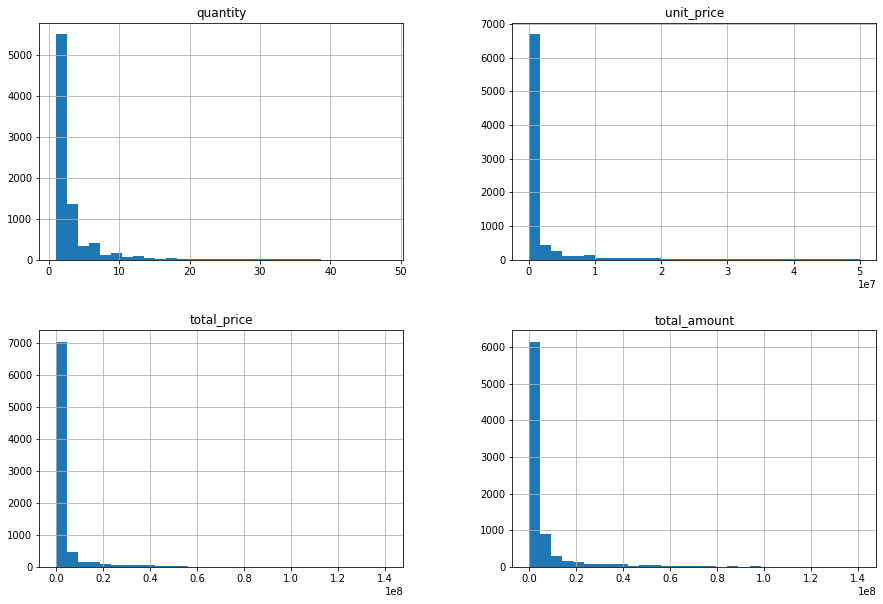

In [5]:
# Distribution of numerical columns
df[['quantity', 'unit_price', 'total_price', 'total_amount']].hist(bins=30, figsize=(15, 10))
plt.show()

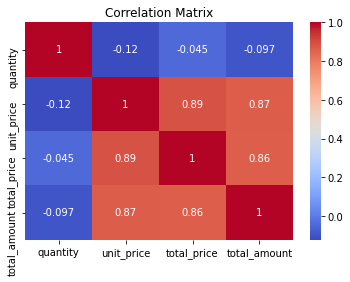

In [12]:


# matrid of correlation between numerical data
cor_mat = df[['quantity', 'unit_price', 'total_price', 'total_amount']].corr()
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

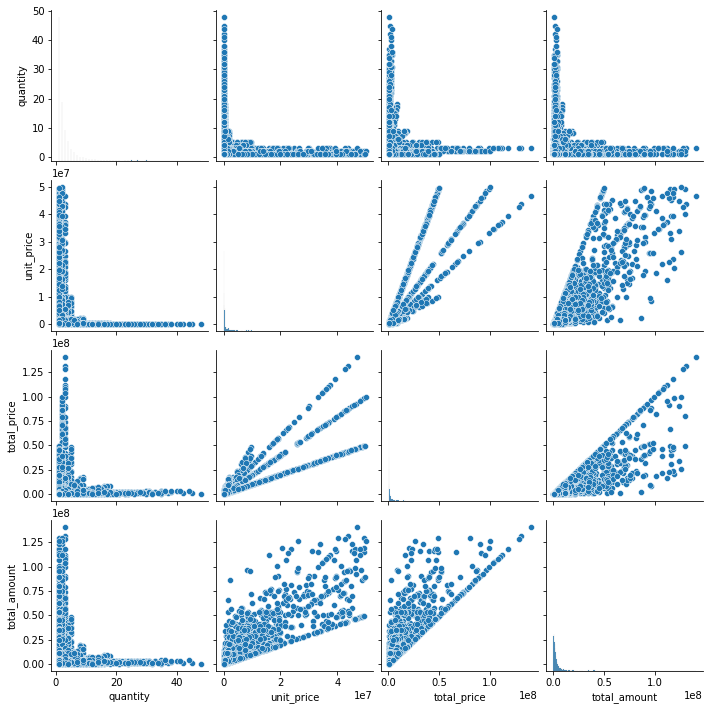

In [15]:
sns.pairplot(df[['quantity', 'unit_price', 'total_price', 'total_amount']])
plt.show()

store
Jewelry Store           1.994763e+10
Electronics Store       7.460084e+09
Home Appliance Store    7.438508e+09
Clothing Store          3.761579e+09
Chain Store             2.656531e+09
Furniture Store         2.130003e+09
Hardware Store          2.128414e+09
Supermarket             1.585871e+09
Sporting Goods Store    1.353317e+09
Toy Store               9.368854e+08
Cosmetics Store         8.833819e+08
Pet Store               6.959822e+08
Bookstore               4.222326e+08
Florist Store           3.517434e+08
Music Store             1.823546e+08
Name: total_amount, dtype: float64


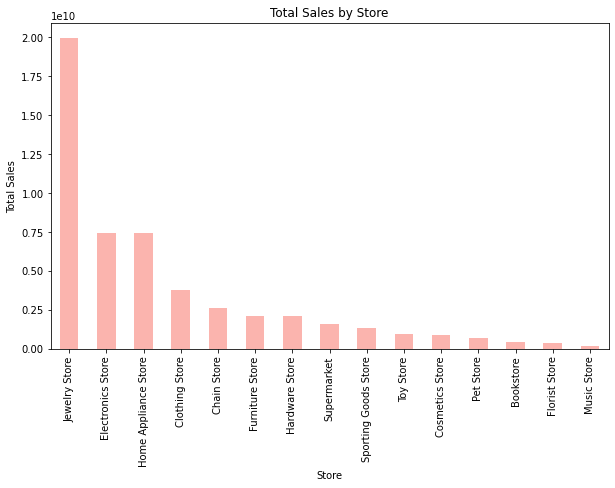

In [48]:
#which store has the most sales
# Group by store and sum the total_amount
store_sales = df.groupby('store')['total_amount'].sum().sort_values(ascending=False)

# Display the store with the most sales
print(store_sales)

#plotting the total sales by store
store_sales.plot(kind='bar', figsize=(10, 6), colormap='Pastel1') #making the graph
plt.title('Total Sales by Store') #the title of our graph
plt.xlabel('Store') #the label of x-axis
plt.ylabel('Total Sales') #the label of y-axis
plt.show() #showing the graph

product_name
Supermarket Product 16     140
Supermarket Product 35     132
Supermarket Product 97     118
Supermarket Product 137    117
Supermarket Product 154    110
Supermarket Product 44     101
Supermarket Product 155    101
Supermarket Product 73     101
Supermarket Product 30      98
Supermarket Product 99      92
Name: quantity, dtype: int64


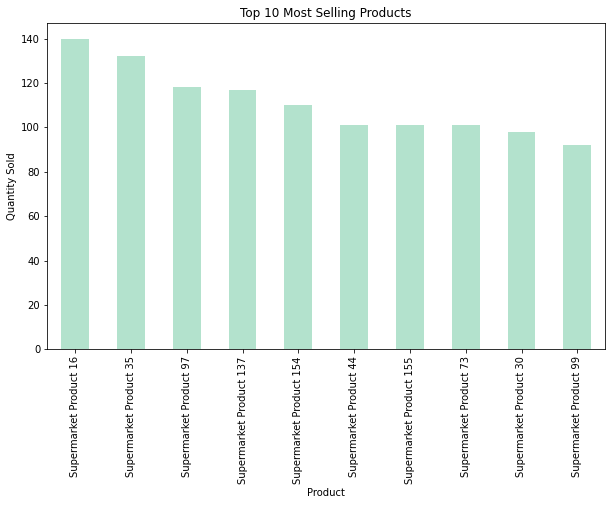

In [49]:
#which product has the most sales
# Group by product_name and sum the quantity sold
product_sales = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Display the top 10 most selling products
print(product_sales.head(10))

# Plot the top 10 most selling products
product_sales.head(10).plot(kind='bar', figsize=(10, 6), colormap='Pastel2')
plt.title('Top 10 Most Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

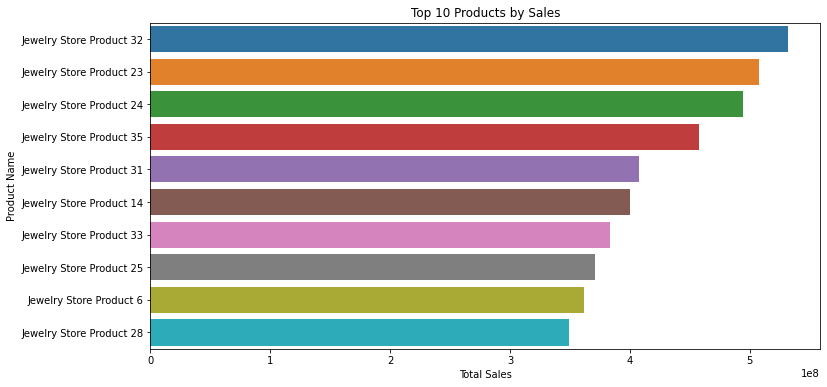

In [87]:
#top products by sale
product_sales = df.groupby('product_name')['total_price'].sum().reset_index().sort_values('total_price', ascending=False)

#plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='total_price', y='product_name', data=product_sales.head(10))
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

store
Jewelry Store           3.359007e+07
Home Appliance Store    1.442166e+07
Electronics Store       9.070817e+06
Furniture Store         3.685969e+06
Clothing Store          2.524391e+06
Hardware Store          1.954232e+06
Sporting Goods Store    1.098050e+06
Chain Store             1.092428e+06
Cosmetics Store         6.408756e+05
Toy Store               6.300028e+05
Bookstore               5.419993e+05
Pet Store               5.279462e+05
Supermarket             4.051475e+05
Music Store             1.785198e+05
Florist Store           1.649670e+05
Name: total_price, dtype: float64


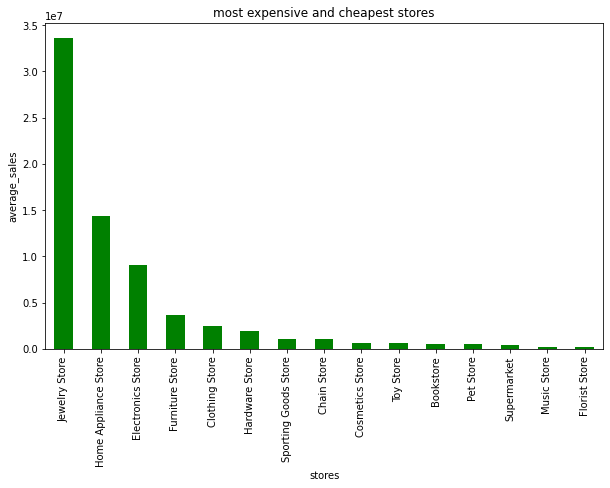

In [50]:
#the moset expensive and the cheapest store to buy from
# Group by store and calculate the average of total_price
average_sales = df.groupby('store')['total_price'].mean().sort_values(ascending=False)
print(average_sales)

# Plot the average sales by store
average_sales.plot(kind='bar', figsize=(10, 6), colormap='ocean')
plt.title("most expensive and cheapest stores")
plt.xlabel("stores")
plt.ylabel("average_sales")
plt.show()

In [51]:
#which product is the most selling product for each store
# Group by store and product_name and sum the quantity sold
for store in df['store'].unique():
    print(f"\nStore: {store}")
    print(df[df['store'] == store].groupby('product_name')['quantity'].sum().idxmax())


Store: Jewelry Store
Jewelry Store Product 32

Store: Electronics Store
Electronics Store Product 64

Store: Cosmetics Store
Cosmetics Store Product 68

Store: Hardware Store
Hardware Store Product 35

Store: Florist Store
Florist Store Product 48

Store: Home Appliance Store
Home Appliance Store Product 73

Store: Music Store
Music Store Product 35

Store: Pet Store
Pet Store Product 26

Store: Bookstore
Bookstore Product 57

Store: Supermarket
Supermarket Product 16

Store: Chain Store
Chain Store Product 180

Store: Furniture Store
Furniture Store Product 90

Store: Sporting Goods Store
Sporting Goods Store Product 33

Store: Toy Store
Toy Store Product 36

Store: Clothing Store
Clothing Store Product 64


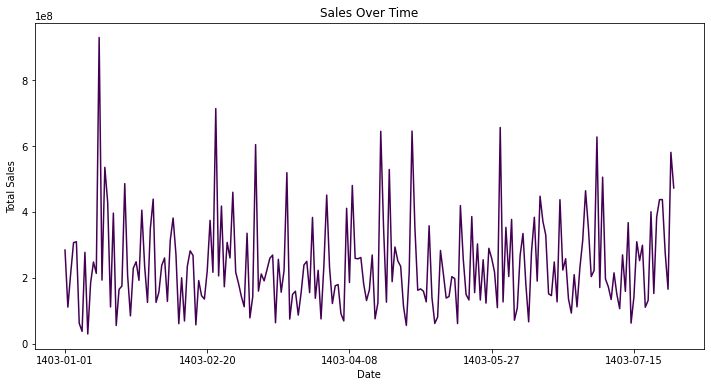

In [52]:
#when do people buy the most
# Group by transaction_date and sum the total_amount
sales_over_time = df.groupby('transaction_date')['total_amount'].sum()

# Plot the sales over time
sales_over_time.plot(figsize=(12, 6), colormap='viridis')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

store
Supermarket             973
Chain Store             776
Florist Store           716
Toy Store               596
Clothing Store          585
Cosmetics Store         556
Pet Store               549
Music Store             518
Sporting Goods Store    516
Hardware Store          511
Electronics Store       425
Bookstore               394
Furniture Store         377
Jewelry Store           365
Home Appliance Store    335
Name: transaction_id, dtype: int64


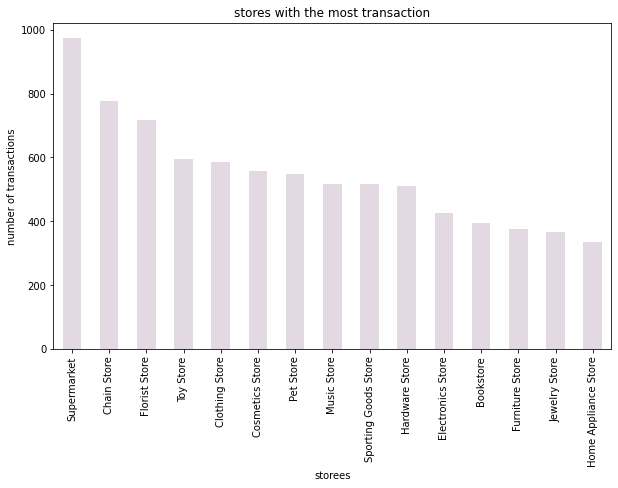

In [56]:
#which store has the most transactions
# Group by store and count the number of transactions
store_transactions = df.groupby('store')['transaction_id'].count().sort_values(ascending=False)
print(store_transactions)

# Plot the number of transactions by store
store_transactions.plot(kind='bar', figsize=(10, 6), colormap='twilight')
plt.title("stores with the most transaction")
plt.xlabel("storees")
plt.ylabel("number of transactions")
plt.show()

store
Bookstore               12
Chain Store             12
Clothing Store          12
Cosmetics Store         12
Electronics Store       12
Florist Store           12
Furniture Store         12
Hardware Store          12
Home Appliance Store    12
Jewelry Store           12
Music Store             12
Pet Store               12
Sporting Goods Store    12
Supermarket             12
Toy Store               12
Name: user_id, dtype: int64


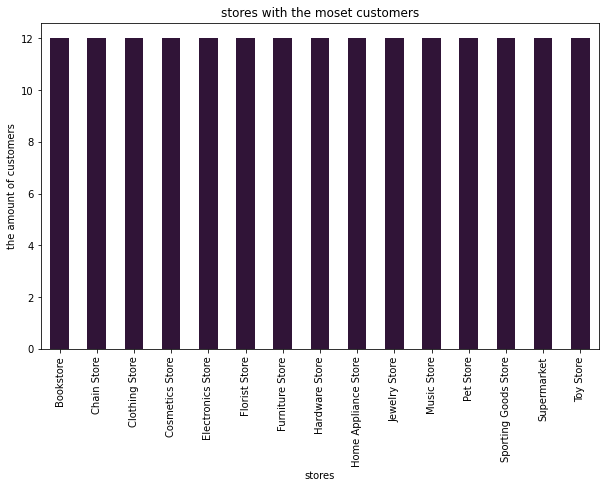

In [ ]:
#which store has the most customers
# Group by store and count the number of unique customers
store_customers = df.groupby('store')['user_id'].nunique().sort_values(ascending=False) #unique counts the number of unique values
print(store_customers)

# Plot the number of customers by store
store_customers.plot(kind='bar', figsize=(10, 6), colormap='twilight_shifted')
plt.title("stores with the moset customers")
plt.xlabel("stores")
plt.ylabel("the amount of customers")
plt.show()

store
Supermarket             81.083333
Chain Store             64.666667
Florist Store           59.666667
Toy Store               49.666667
Clothing Store          48.750000
Cosmetics Store         46.333333
Pet Store               45.750000
Music Store             43.166667
Sporting Goods Store    43.000000
Hardware Store          42.583333
Electronics Store       35.416667
Bookstore               32.833333
Furniture Store         31.416667
Jewelry Store           30.416667
Home Appliance Store    27.916667
Name: transaction_id, dtype: float64


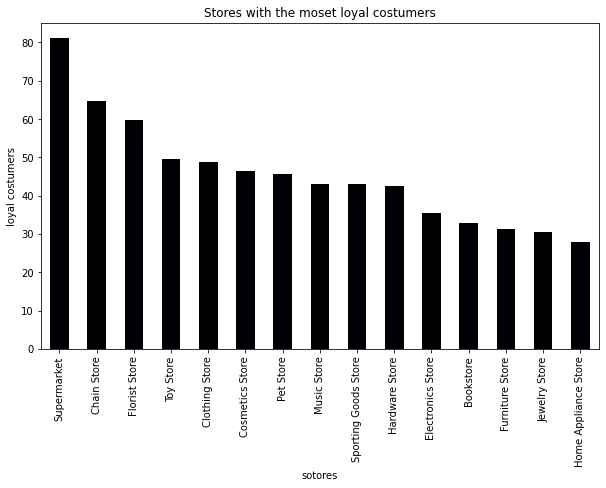

In [ ]:
#which store has the most loyal customers
# Group by store and user_id and count the number of transactions
#grouping the store and user id together as one and then grouping with the transaction id to count
store_loyal_customers = df.groupby(['store', 'user_id'])['transaction_id'].count().reset_index() #reset index turns back the results of the code into the dataset
store_loyal_customers = store_loyal_customers.groupby('store')['transaction_id'].mean().sort_values(ascending=False)#mean calculates the average of the values
print(store_loyal_customers)

#showing the plot 
store_loyal_customers.plot(kind='bar', figsize=(10, 6), colormap='inferno')
plt.title("Stores with the moset loyal costumers")
plt.xlabel("sotores")
plt.ylabel("loyal costumers")
plt.show()

store
Bookstore                78
Chain Store             197
Clothing Store           98
Cosmetics Store          70
Electronics Store       144
Florist Store            50
Furniture Store          99
Hardware Store           70
Home Appliance Store    114
Jewelry Store            50
Music Store              60
Pet Store                40
Sporting Goods Store    108
Supermarket             180
Toy Store                88
Name: product_name, dtype: int64


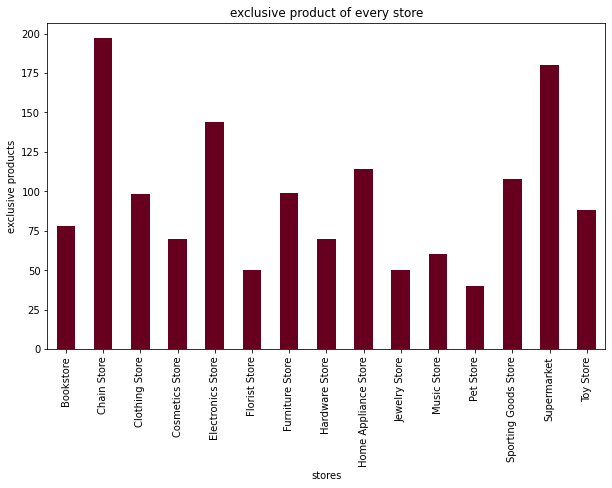

In [60]:
#exclusive product of every store
# Group by store and product_name and count the number of transactions
store_exclusive_products = df.groupby(['store', 'product_name'])['transaction_id'].count().reset_index()
store_exclusive_products = store_exclusive_products.groupby('store')['product_name'].count()
print(store_exclusive_products)

#showing the plot
store_exclusive_products.plot(kind='bar', figsize=(10,6), colormap='RdGy')
plt.title("exclusive product of every store")
plt.xlabel("stores")
plt.ylabel("exclusive products")
plt.show()

store
Jewelry Store           8.842358e+09
Home Appliance Store    3.464397e+09
Electronics Store       2.185609e+09
Furniture Store         9.764924e+08
Clothing Store          6.201448e+08
Hardware Store          5.355193e+08
Sporting Goods Store    2.666751e+08
Chain Store             1.998729e+08
Toy Store               1.530129e+08
Cosmetics Store         1.472857e+08
Pet Store               1.414603e+08
Bookstore               9.966566e+07
Music Store             5.510790e+07
Supermarket             5.167978e+07
Florist Store           3.780884e+07
Name: unit_price, dtype: float64


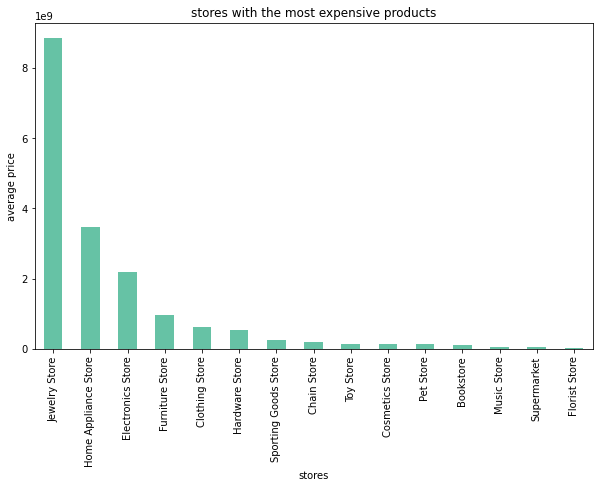

In [11]:
#which store has the most expensive products
# Group by store and calculate the average of unit_price
store_expensive_products = df.groupby('store')['unit_price'].sum().sort_values(ascending=False)
print(store_expensive_products)

#showing the plot
store_expensive_products.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("stores with the most expensive products")
plt.xlabel("stores")
plt.ylabel("average price")
plt.show()

In [19]:
# Correlation between price and quantity sold
price_quantity_corr = df['unit_price'].corr(df['quantity'])
print("\nCorrelation between price and quantity sold:")
print(price_quantity_corr)


Correlation between price and quantity sold:
-0.12306345790212442


User with the most transactions:
user_id
11    762
10    725
4     717
3     708
9     689
Name: count, dtype: int64


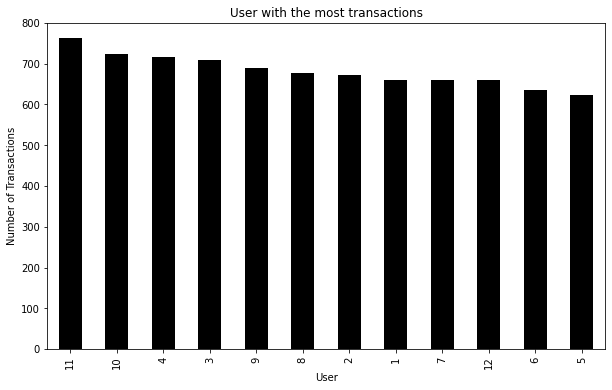

In [67]:
# User with the most transactions
user_transactions = df['user_id'].value_counts().sort_values(ascending=False)
print("User with the most transactions:")
print(user_transactions.head())

#showing the user with most transaction
user_transactions.plot(kind='bar', figsize=(10, 6), colormap='copper')
plt.title('User with the most transactions')
plt.xlabel('User')
plt.ylabel('Number of Transactions')
plt.show()

User with the most revenue:
user_id
2     2.795794e+09
11    2.781148e+09
3     2.713384e+09
10    2.552744e+09
7     2.452395e+09
Name: total_price, dtype: float64


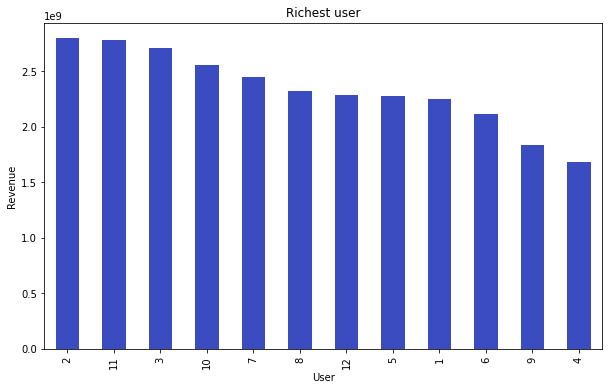

In [68]:
# User with the most spended money
user_revenue = df.groupby('user_id')['total_price'].sum().sort_values(ascending=False)
print("User with the most revenue:")
print(user_revenue.head())

#showing the user with most spended money
user_revenue.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Richest user')
plt.xlabel('User')  
plt.ylabel('Revenue')
plt.show()


Average spending per user:
user_id
2     4.154226e+06
3     3.832464e+06
7     3.715750e+06
11    3.649800e+06
5     3.643226e+06
Name: total_price, dtype: float64


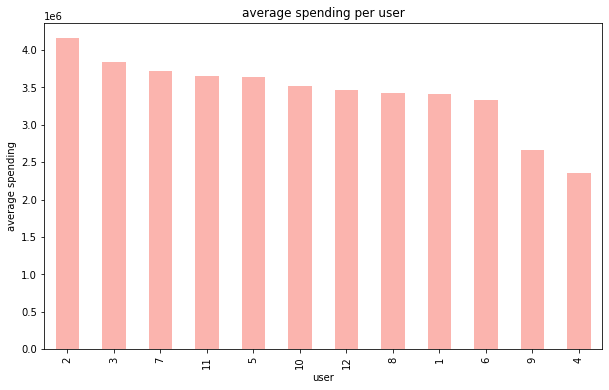

In [ ]:
# Average spending per user
average_spending = df.groupby('user_id')['total_price'].mean().sort_values(ascending=False)
print("\nAverage spending per user:")
print(average_spending.head())

#showing the average spending per user
average_spending.plot(kind='bar', figsize=(10,6), colormap="Pastel1")
plt.title("average spending per user")
plt.xlabel("user")
plt.ylabel("average spending")
plt.show()

In [70]:
# Segment users based on total spending and number of transactions
user_behavior = df.groupby('user_id').agg(
    total_spent=('total_amount', 'sum'),
    num_transactions=('transaction_id', 'nunique')
)

# Define segments
user_behavior['segment'] = pd.cut(user_behavior['total_spent'],
                                  bins=[0, 1000, 5000, float('inf')],
                                  labels=['Low Spender', 'Medium Spender', 'High Spender'])

print("User Segmentation:")
print(user_behavior)

User Segmentation:
          total_spent  num_transactions       segment
user_id                                              
1        4.114019e+09               310  High Spender
2        4.824619e+09               315  High Spender
3        4.897524e+09               338  High Spender
4        3.333319e+09               322  High Spender
5        4.167616e+09               301  High Spender
6        3.797353e+09               304  High Spender
7        4.731971e+09               311  High Spender
8        4.452082e+09               313  High Spender
9        3.356738e+09               326  High Spender
10       4.654176e+09               348  High Spender
11       5.236716e+09               345  High Spender
12       4.368383e+09               309  High Spender


In [ ]:
# Combine date and time into a single column
df['transaction_datetime'] = df['transaction_date'] + ' ' + df['transaction_time']

# Convert to jdatetime
df['transaction_datetime'] = df['transaction_datetime'].apply(lambda x: jdatetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
#sale based on month
def get_season(date):
    month = date.month
    if month in [1, 2, 3]:
        return 'Spring'
    elif month in [4, 5,6]:
        return 'Summer'
    elif month in [7,8,9]:
        return 'Autumn'
    elif month in [10,11,12]:
        return 'Winter'

# Extract season, weekday, and hour
df['season'] = df['transaction_datetime'].apply(get_season)
df['weekday'] = df['transaction_datetime'].apply(lambda x: x.weekday()) 
df['hour'] = df['transaction_datetime'].apply(lambda x: x.hour)

Seasonal Sales:
   season   total_price
0  Autumn  4.186401e+09
1  Spring  1.208316e+10
2  Summer  1.179647e+10


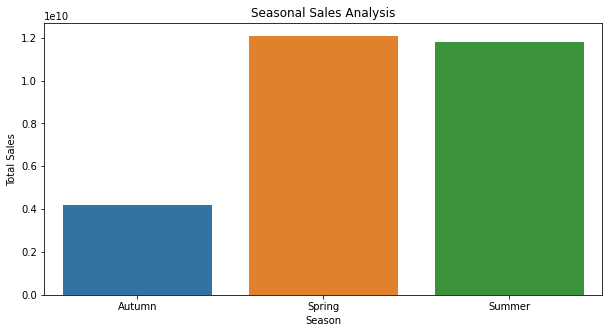

In [78]:
# Group by season and calculate total sales
seasonal_sales = df.groupby('season')['total_price'].sum().reset_index()
print("Seasonal Sales:")
print(seasonal_sales)

# Plot seasonal sales
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='total_price', data=seasonal_sales)
plt.title('Seasonal Sales Analysis')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()



Weekday Sales:
   weekday   total_price
0        0  4.526381e+09
1        1  3.832427e+09
2        2  3.439544e+09
3        3  4.194348e+09
4        4  4.405634e+09
5        5  4.003638e+09
6        6  3.664065e+09


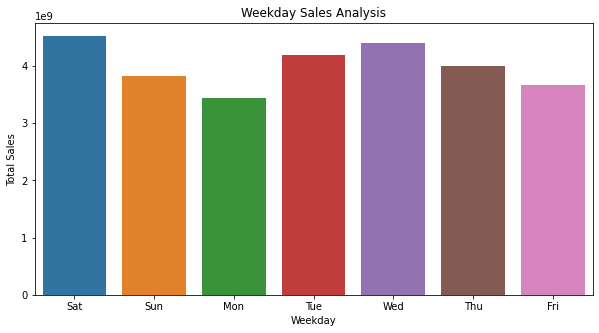

In [79]:
# Group by weekday and calculate total sales
weekday_sales = df.groupby('weekday')['total_price'].sum().reset_index()
print("\nWeekday Sales:")
print(weekday_sales)

# Plot weekday sales
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='total_price', data=weekday_sales)
plt.title('Weekday Sales Analysis')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Sat', 'Sun', 'Mon', 'Tue','Wed','Thu','Fri'])
plt.show()



Hourly Sales:
    hour   total_price
0      0  1.414652e+09
1      1  1.242262e+09
2      2  1.117494e+09
3      3  1.124067e+09
4      4  9.623539e+08
5      5  1.231593e+09
6      6  1.490269e+09
7      7  7.566200e+08
8      8  7.293167e+08
9      9  1.300770e+09
10    10  1.187261e+09
11    11  1.347612e+09
12    12  1.026870e+09
13    13  9.599251e+08
14    14  9.188615e+08
15    15  1.410301e+09
16    16  7.849260e+08
17    17  1.013659e+09
18    18  1.797866e+09
19    19  9.838035e+08
20    20  1.247554e+09
21    21  1.662310e+09
22    22  1.198954e+09
23    23  1.156734e+09


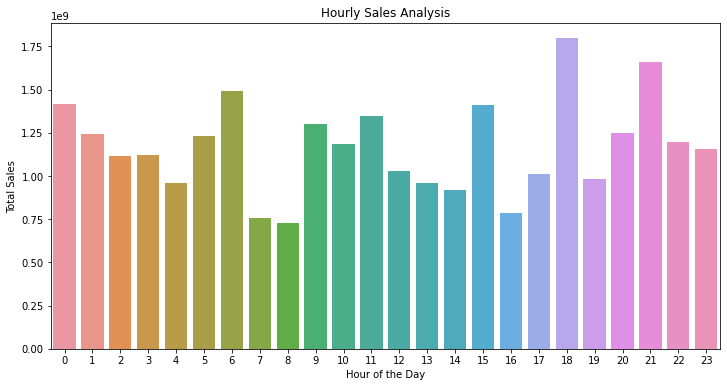

In [80]:
# Group by hour and calculate total sales
hourly_sales = df.groupby('hour')['total_price'].sum().reset_index()
print("\nHourly Sales:")
print(hourly_sales)

# Plot hourly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_price', data=hourly_sales)
plt.title('Hourly Sales Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

   month   total_price
0      1  4.209952e+09
1      2  4.028081e+09
2      3  3.845131e+09
3      4  4.126152e+09
4      5  3.519725e+09
5      6  4.150594e+09
6      7  4.186401e+09


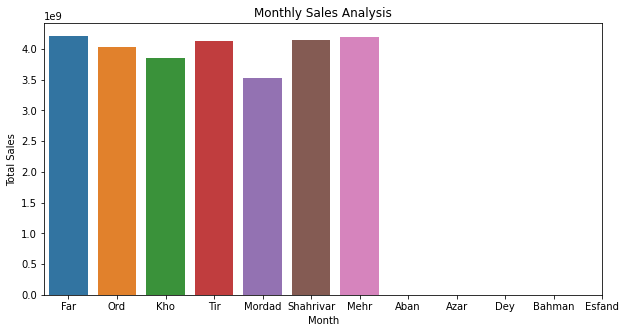

In [81]:
df['month'] = df['transaction_datetime'].apply(lambda x: x.month)
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()
print(monthly_sales)

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='total_price', data=monthly_sales)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Far', 'Ord', 'Kho', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', 'Azar', 'Dey', 'Bahman', 'Esfand'])
plt.show()

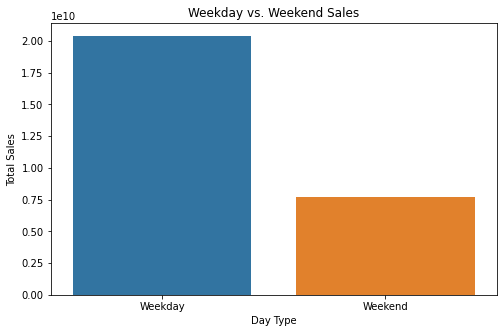

In [82]:
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekday_weekend_sales = df.groupby('day_type')['total_price'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='total_price', data=weekday_weekend_sales)
plt.title('Weekday vs. Weekend Sales')
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.show()

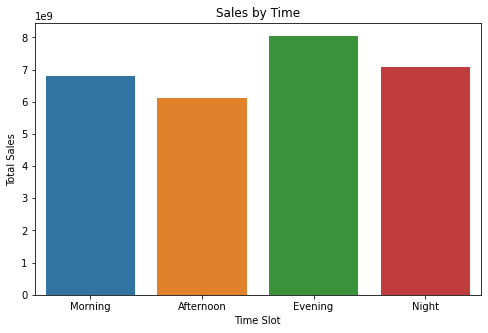

In [ ]:
def get_time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['hour'].apply(get_time_slot)
time_slot_sales = df.groupby('time_slot')['total_price'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='time_slot', y='total_price', data=time_slot_sales, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Sales by Time')
plt.xlabel('Time Slot')
plt.ylabel('Total Sales')
plt.show()